In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
#upload raw data
final_demo=pd.read_csv('../Project_2/data/raw/df_final_demo.txt')
final_experiment_clients=pd.read_csv('../Project_2/data/raw/df_final_experiment_clients.txt')
final_web_data_pt1=pd.read_csv('../Project_2/data/raw/df_final_web_data_pt_1.txt')
final_web_data_pt2=pd.read_csv('../Project_2/data/raw/df_final_web_data_pt_2.txt')

# Context & Data Overview
As a newly employed data analyst in Vanguard's Customer Experience (CX) team, your initial task plunges you into analyzing the outcomes of a recently launched digital experiment. The team is eagerly anticipating the results, and your expertise is sought to unravel the insights.

# Dataset

1. **Client Profiles (df_final_demo):**
    - **client_id**: Unique identifier for clients (int)
    - **clnt_tenure_yr**: Clients yearly with Vanguard (int)
    - **clnt_tenure_mnth**: Clients months with vanguard (int)
    - **clnt_age**: Age of the client (float)
    - **gendr**: Client's gender (int)
    - **num_accts**: Number of accounts held by the client (int)
    - **Bal**: Total balance across all client accounts (float)
    - **call_6_mnth**: Number of client calls in the past six months (int)
    - **logons_6_mnth**: Frequency of client logins to Vanguard's platform in the past six months (int)

2. **Digital Footprints (df_final_web_data):**
    - **client_id**: Unique identifier for clients (int)
    - **visitor_id**: Unique ID for each client-device combination (str)
    - **visit_id**: Unique ID for each web visit/session (str)
    - **process_step**: Marks each step in the digital process (str)

3. **Experiment Roster (df_final_experiment_clients):**
    - **client_id**: Unique identifier for clients (int)
    - **Variation**: Indicates if the client was part of the control or test group (str)
        - Control group: Clients interacted with Vanguard's traditional online process.
        - Test group: Clients experienced the new, updated digital interface.

# Hypothesis:
Vanguard's hypothesis suggests that e and contemporary User Interface (UI), complemented by timely in-context prompts, could enhance the online process for clients.

# Question:
Will these changes incentivize to complete the process?

# Cleaning

In [3]:
# Client Profiles

final_demo.dropna(thresh=7,inplace=True)
# drop if client age is < of client tenure, due to lack of sense and that they  than 1% of the dataset
final_demo=final_demo[final_demo['clnt_age']>=final_demo['clnt_tenure_yr']]
#replace X by U. We assume that X was a miss tipping and should be U.
final_demo['gendr']=final_demo['gendr'].str.replace('X','U')

# Digital Footprints

final_web_data_final= pd.concat([final_web_data_pt1,final_web_data_pt2])
final_web_data_final.drop_duplicates(inplace=True)


# Annotation

In [51]:
final_demo['num_accts'].value_counts() # does it make sense to have 8, 7 6 accounts ? --> check outlier probably

num_accts
2.0    55072
3.0    12405
4.0     2217
5.0      282
6.0       33
7.0        8
1.0        2
8.0        1
Name: count, dtype: int64

In [50]:
final_demo['logons_6_mnth'].value_counts() # why not 0.

logons_6_mnth
9.0    12282
3.0    10150
4.0    10130
7.0     9800
5.0     9180
6.0     7824
8.0     4774
2.0     2978
1.0     2902
Name: count, dtype: int64

## Bal - comprehension

In [10]:
print(f"average {final_demo['bal'].mean().__round__(2)},median {final_demo['bal'].median()}, mode   {final_demo['bal'].mode()[0]}")

average 79811.77,median 43404.634999999995, mode   13857.129999999996


In [3]:
# 2 - Measures of Dispersion:
print(f"var   {final_demo['bal'].var()}")
print(f"std   {final_demo['bal'].std()}")
print(f"range   {(final_demo['bal'].max()-final_demo['bal'].min())}")
print(f"q25   {final_demo['bal'].quantile([0.25, 0.5, 0.75,.95])}")

var   90907500113.93842
std   301508.70653090335
range   16306250.73
q25   0.25     37346.835
0.50     63332.900
0.75    137544.905
0.95    524823.663
Name: bal, dtype: float64


In [45]:
final_demo['bal'].skew()

11.138764704917897

In [47]:
final_demo['bal'].kurt()

276.7268035905861

<Axes: >

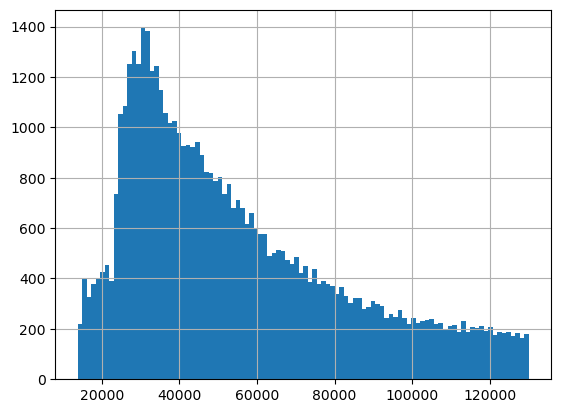

In [4]:
final_demo.query('bal<130000')['bal'].hist(bins=100)

<Axes: >

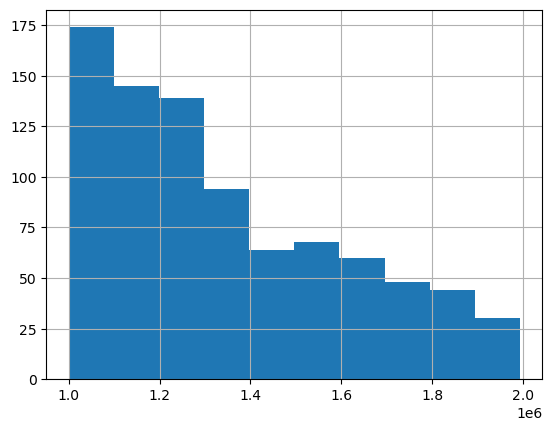

In [28]:
final_demo[(final_demo['bal']>=1000000)&(final_demo['bal']<2000000)]['bal'].hist(bins=10)

In [24]:
final_demo[final_demo['bal']>=5000000]

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
2171,2291985,7.0,85.0,41.0,M,2.0,8247729.97,1.0,4.0
13318,9440656,7.0,94.0,63.0,F,2.0,8292996.21,6.0,9.0
14057,3519657,18.0,218.0,66.5,M,6.0,7741994.01,6.0,9.0
14425,8700059,11.0,132.0,65.0,M,2.0,5439354.90,3.0,6.0
20844,6765532,28.0,336.0,56.0,M,3.0,5187970.13,5.0,8.0
20871,1678193,24.0,299.0,65.5,M,3.0,8137343.24,6.0,9.0
21184,987970,14.0,179.0,74.5,M,3.0,7339443.17,4.0,9.0
22943,9290030,28.0,341.0,67.5,M,4.0,6353000.43,5.0,8.0
23849,7070097,11.0,133.0,53.0,M,2.0,8986419.77,6.0,9.0
25162,8841326,32.0,391.0,60.5,F,2.0,5085307.11,6.0,9.0


In [18]:
final_demo['bal'].sort_values(ascending=False).head(100)

39367    16320040.15
63746    12838418.01
23849     8986419.77
13318     8292996.21
2171      8247729.97
            ...     
17238     3193269.83
52995     3191837.41
50340     3191769.31
46786     3189564.50
31300     3171343.45
Name: bal, Length: 100, dtype: float64

# Question demographics

- **primary clients**:
    1. who is using this online process?
    
    It seems that all the client up to a certain degree are using the online process as all they all had login at least once in the last 6 months. 
    
    2. arethe primary clients younger or older, new or long-standing?

   The primary client is an individual, either a man or a woman, who holds more than two open accounts with a balance of $148K. They are between 21 and 70 years old and have maintained an account for a duration spanning 6 to 25 years.



In [73]:
# account
final_demo['num_accts'].mean()

2.2550842616395315

In [74]:
final_demo['bal'].mean()

148004.15420322763

In [57]:
#gendr
final_demo['gendr'].value_counts(normalize='index').round(2)*100

gendr
U    34.0
M    33.0
F    32.0
Name: proportion, dtype: float64

It seems that there is an equal amount of female and men.

In [64]:
#age
pd.cut(final_demo['clnt_age'],
       bins=[0, 21, 31, 41, 51, 61, 71, float('inf')],
       labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71+'],
       right=False).value_counts(normalize='index').sort_values(ascending=False).round(2)*100

clnt_age
51-60    22.0
41-50    18.0
21-30    18.0
31-40    18.0
61-70    16.0
71+       5.0
0-20      2.0
Name: proportion, dtype: float64

<Axes: xlabel='clnt_age', ylabel='Count'>

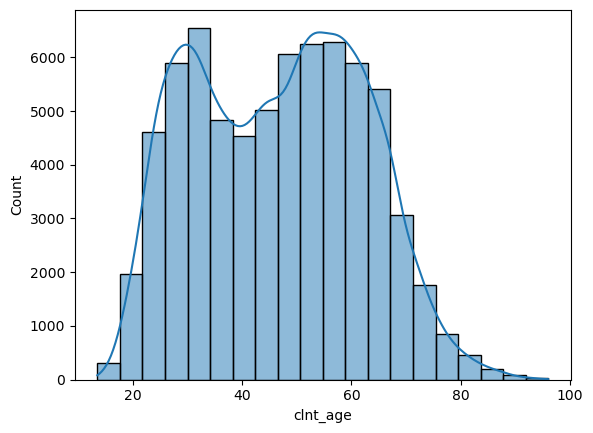

In [70]:
sns.histplot(data=final_demo['clnt_age'],bins=20,kde=True)

primary age of the client is between 21 and 70 years old

In [71]:
# Oldness
pd.cut(final_demo['clnt_tenure_yr'],
       bins=[0,2,5,10,15,20,25, float('inf')],
       labels=['0-2', '3-5', '6-10', '11-15', '16-20', '21-25', '26+'],
       right=False).value_counts(normalize='index').sort_values(ascending=False).round(2)*100


clnt_tenure_yr
6-10     38.0
11-15    24.0
16-20    16.0
21-25    10.0
3-5       7.0
26+       5.0
0-2       0.0
Name: proportion, dtype: float64

<Axes: xlabel='clnt_tenure_yr', ylabel='Count'>

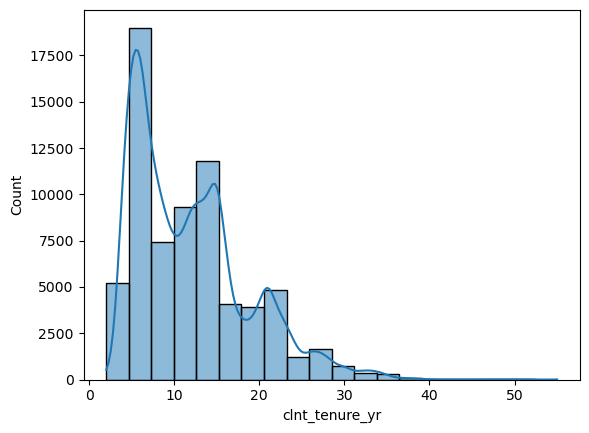

In [72]:
sns.histplot(data=final_demo['clnt_tenure_yr'],bins=20,kde=True)

Primary the clients has a ternure between 6 and 25 years.